In [2]:
import numpy as np
import matplotlib.pyplot as plt
import Library as lb
from filterpy.common import Q_discrete_white_noise
import tensorflow as tf
from tensorflow import keras

Text(0.5, 0, 'Prey [-]')

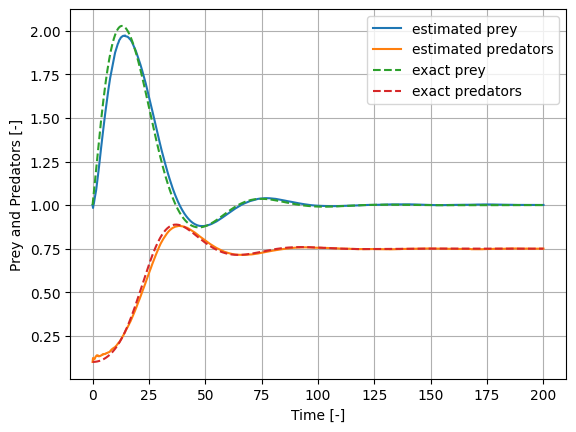

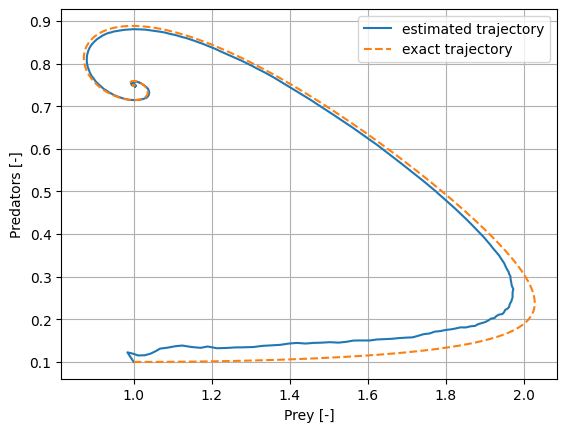

In [3]:
T = 200
Nt = 1000
dt = T/Nt
x0 = 1
y0 = 0.1
rho = 0.1
alpha = 0.25
beta = 0.2
gamma = 0.1
delta = 0.1

# Define the measurament function
def hx(x):
   return np.array([x[0], x[1]])

# Define the transition function
def fx(x, dt):
    F = np.array([[1 + alpha*dt - beta*dt*x[1] -rho*dt*x[0],                             0],
                  [0,                                           1-gamma*dt + delta*dt*x[0]]])
    return np.dot(F, x)

# Assign the initial x array
x = np.array([x0, y0])

# Define the covariance matrix
P = np.eye(2)
# Define the measurament noise
R = np.eye(2)
# Define the process noise
Q = Q_discrete_white_noise(dim=2, dt=dt, var=.001)

# Create the model from library
f = lb.EnKF(dim_x=2, dim_z=2, f=fx, h=hx, get_data=None, dt=dt, t0=0)
f.create_model(x0=np.array([x0, y0]), P=P, R=R, Q=Q, N=1000)

# Predict/Update loop
x_hat = f.loop(T)

x_ex = np.zeros((Nt+1,2))
tt=np.arange(0,T+dt,dt)
for i,t in enumerate(tt):
    if i==0:
        x_ex[i,:] = np.array([x0,y0])
    else:
        x_ex[i,0] = x_ex[i-1,0] + dt*x_ex[i-1,0]*(alpha-beta*x_ex[i-1,1]-rho*x_ex[i-1,0])
        x_ex[i,1] = x_ex[i-1,1] + dt*x_ex[i-1,1]*(-gamma+delta*x_ex[i-1,0])

plt.figure()
plt.grid(True)
plt.plot(tt,x_hat[:,0], label='estimated prey')
plt.plot(tt,x_hat[:,1], label='estimated predators')
plt.plot(tt,x_ex[:,0], label='exact prey', linestyle='--')
plt.plot(tt,x_ex[:,1], label='exact predators', linestyle='--')
plt.legend()
plt.ylabel('Prey and Predators [-]')
plt.xlabel('Time [-]')

plt.figure()
plt.grid(True)
plt.plot(x_hat[:,0],x_hat[:,1], label='estimated trajectory')
plt.plot(x_ex[:,0],x_ex[:,1], label='exact trajectory', linestyle='--')
plt.legend()
plt.ylabel('Predators [-]')
plt.xlabel('Prey [-]')

Advancing: 0.0%
Advancing: 0.1%
Advancing: 0.2%
Advancing: 0.3%
Advancing: 0.4%
Advancing: 0.5%
Advancing: 0.6%
Advancing: 0.7000000000000001%
Advancing: 0.8%
Advancing: 0.8999999999999999%
Advancing: 1.0%
Advancing: 1.0999999999999999%
Advancing: 1.2%
Advancing: 1.3%
Advancing: 1.4000000000000001%
Advancing: 1.5%
Advancing: 1.6%
Advancing: 1.7000000000000002%
Advancing: 1.7999999999999998%
Advancing: 1.9%
Advancing: 2.0%
Advancing: 2.1%
Advancing: 2.1999999999999997%
Advancing: 2.3%
Advancing: 2.4%
Advancing: 2.5%
Advancing: 2.6%
Advancing: 2.7%
Advancing: 2.8000000000000003%
Advancing: 2.9000000000000004%
Advancing: 3.0%
Advancing: 3.1%
Advancing: 3.2%
Advancing: 3.3000000000000003%
Advancing: 3.4000000000000004%
Advancing: 3.5000000000000004%
Advancing: 3.5999999999999996%
Advancing: 3.6999999999999997%
Advancing: 3.8%
Advancing: 3.9%
Advancing: 4.0%
Advancing: 4.1000000000000005%
Advancing: 4.2%
Advancing: 4.3%
Advancing: 4.3999999999999995%
Advancing: 4.5%
Advancing: 4.6%
Advancin

Text(0.5, 0, 'Prey [-]')

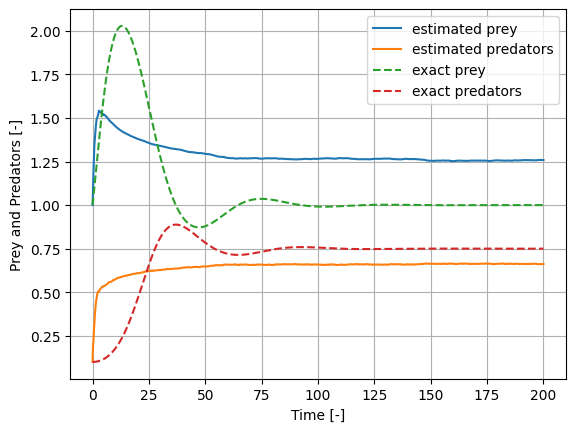

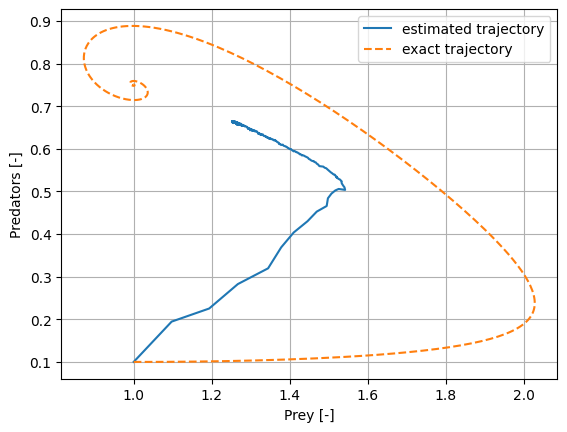

In [4]:
# Surrogate model

T = 200
Nt = 1000
dt = T/Nt
x0 = 1
y0 = 0.1
rho = 0.1
alpha = 0.25
beta = 0.2
gamma = 0.1
delta = 0.1

# Define the measurament function
def hx(x):
   return np.array([x[0], x[1]])

# Define the transition function
NN=keras.models.load_model('../data/model_NN.h5', compile=False)
def fxx(x, dt):
    x_ = np.empty((1,2,))
    x_[0,:] = x
    return NN(x_)

# Assign the initial x array
x = np.array([x0, y0])

# Define the covariance matrix
P = np.eye(2)
# Define the measurament noise
R = np.eye(2)
# Define the process noise
Q = Q_discrete_white_noise(dim=2, dt=dt, var=.001)


# Create the model from library
f = lb.EnKF(dim_x=2, dim_z=2, f=fxx, h=hx, get_data=None, dt=dt, t0=0)
f.create_model(x0=np.array([x0, y0]), P=P, R=R, Q=Q, N=100)

# Predict/Update loop
x_hat = f.loop(T, verbose=True)

x_ex = np.zeros((Nt+1,2))
tt=np.arange(0,T+dt,dt)
for i,t in enumerate(tt):
    if i==0:
        x_ex[i,:] = np.array([x0,y0])
    else:
        x_ex[i,0] = x_ex[i-1,0] + dt*x_ex[i-1,0]*(alpha-beta*x_ex[i-1,1]-rho*x_ex[i-1,0])
        x_ex[i,1] = x_ex[i-1,1] + dt*x_ex[i-1,1]*(-gamma+delta*x_ex[i-1,0])

plt.figure()
plt.grid(True)
plt.plot(tt,x_hat[:,0], label='estimated prey')
plt.plot(tt,x_hat[:,1], label='estimated predators')
plt.plot(tt,x_ex[:,0], label='exact prey', linestyle='--')
plt.plot(tt,x_ex[:,1], label='exact predators', linestyle='--')
plt.legend()
plt.ylabel('Prey and Predators [-]')
plt.xlabel('Time [-]')

plt.figure()
plt.grid(True)
plt.plot(x_hat[:,0],x_hat[:,1], label='estimated trajectory')
plt.plot(x_ex[:,0],x_ex[:,1], label='exact trajectory', linestyle='--')
plt.legend()
plt.ylabel('Predators [-]')
plt.xlabel('Prey [-]')